# Aufgabe 2: Gaußfilter
Anstatt wie in der vorigen Aufgabe an einer ausgewählten Frequenz hart abzuschneiden, kann mittels eines Faktors
\begin{align}
 h(u,v) = \mathrm{e}^{-\frac{D^2(u,v)}{2\sigma^2}},\qquad h \in [0;1]
\end{align}
auch ein weicher Übergang erzeugt werden.

Verwenden Sie eine Gauß-Glocke für die Hoch und Tiefpassfilterung und berechnen Sie den Faktor $h$ in Abhängigkeit von der Entfernung $D(u,v)$ zum Ursprung!
Führen Sie die Transformationen ansonsten wie in Teilaufgabe 1 durch! Die Varianz $\sigma$ der Gauß-Glocke ist also mit dem dort gegebenen Radius gleichzusetzen.
Was ändert sich in den Ausgabebildern im Vergleich zu Teilaufgabe 1?

## 0. Pfade, Pakete etc.

In [12]:
import glob
import urllib.request

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import imageio
import numpy as np

import math

In [14]:
image_filter = './../material/Bilder/*.jpg'
# image_filter = './../material/Bilder/Pollen1.jpg'

## 1. Definition des Filters

Definieren Sie den Gauß-Filter als Funktion des Radius $D$ und der Konstante $\sigma$:

In [15]:
sigma = 30
gauss_filter = lambda D: np.exp((-D*D)/(2*sigma*sigma))

## 2. Laden des Bildes

In [16]:
image_path = np.random.choice(glob.glob(image_filter))
image = imageio.imread(image_path)

<IPython.core.display.Javascript object>


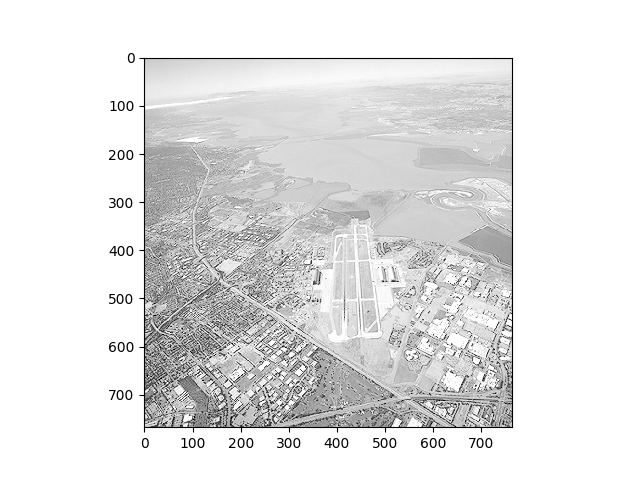

In [17]:
plt.figure()
plt.imshow(image, cmap='gray')

## 3. Normalisieren des Bildes

In [18]:
image_max = np.float32(np.max(image))  # Maximum bestimmen
image_min = np.float32(np.min(image))  # Minimum bestimmen
image = (np.float32(image) - image_min) / (image_max-image_min)

## 4. Berechnung der Fouriertransformation
Setzen Sie hier ihre Lösung aus der vorigen Aufgabe ein:

In [19]:
image_transformed = np.fft.fftshift(np.fft.fft2(image))

## 5. Filterung

Setzen Sie hier ihre Lösung `ex3_filter_spectrum` aus der vorigen Aufgabe ein:

In [20]:
def ex3_filter_spectrum(spectrum, radial_filter):
    for j in range(spectrum.shape[1]):
        for i in range(spectrum.shape[0]):
            D = np.sqrt(np.power(i - spectrum.shape[0]/2, 2) + np.power(j - spectrum.shape[1]/2, 2))
            spectrum[i, j] *= radial_filter(D)
    return spectrum

Das transformierte Bild (Spektrum) wird nun gefiltert:

In [21]:
image_transformed_filtered = ex3_filter_spectrum(image_transformed, gauss_filter)

## 6. Inverse Filterung
Das veränderte Spektrum soll nun in den Ortsbereich zurücktransformiert werden. Verwenden Sie dazu die entsprechenden Funktionen des Paketes `numpy.fft`.

In [22]:
inverse_transformed_shifted = np.fft.ifftshift(image_transformed_filtered)
inverse_transformed = np.fft.ifft2(inverse_transformed_shifted).real

Vergleichen Sie nun das gefilterte Bild mit dem Originalbild:

<IPython.core.display.Javascript object>


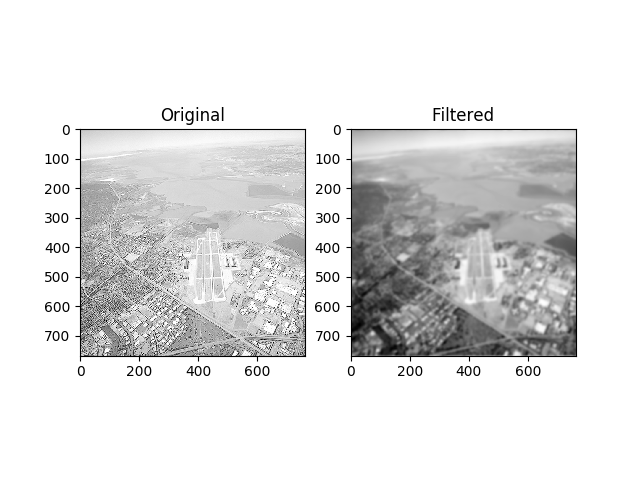

Text(0.5, 1.0, 'Filtered')

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True)
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original')

# no ringing, since the inverse Fourier transform of the Gaussian is also Gaussian
axs[1].imshow(inverse_transformed, cmap='gray')
axs[1].set_title('Filtered')